# Student Data Analysis Notebook
This notebook houses the relevant data exploration and analysis for this test data set.
Found here: https://www.kaggle.com/datasets/atharvbharaskar/students-test-data/

There are 2 goals
1. Determine 3 limitations of the data and determine any ways to enhance it.
2. Analyze a particular trend and report the findings in written and verbal format with a slide deck

## Data Exploration
### Import Libraries

In [156]:
import pandas as pd # Data Manipulation
from pathlib import Path # Path reading
import matplotlib.pyplot as plt # Plot creation
import numpy as np # Data Math

### Setup for Plots

In [157]:
import matplotlib.pyplot as plt
# Default Plot
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.

### Create an images folder and define a method for saving files

In [158]:
IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Read the Data

In [159]:
data_path = Path() / "archive" / "Private_data.csv"
students = pd.read_csv(data_path)
students.head()

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


In [160]:
# Check if there are any Nulls
null_count = students.isnull().sum()
null_count #No null values to consider

Unnamed: 0                              0
NAME OF THE STUDENT                     0
UNIVERSITY                              0
PROGRAM NAME                            0
Specialisation                          0
SEMESTER                                0
Domain                                  0
GENERAL MANAGEMENT SCORE (OUT of 50)    0
Domain Specific SCORE (OUT 50)          0
TOTAL SCORE (OUT of 100)                0
RANK                                    0
PERCENTILE                              0
dtype: int64

In [161]:
# Look at some Value counts
students.describe()
print(students["PROGRAM NAME"].value_counts())
print(students["SEMESTER"].value_counts())
print(students["UNIVERSITY"].value_counts())
print(students["Domain"].value_counts())

PROGRAM NAME
MBA              57
BBA              44
B.Com            37
Intg. BBA+MBA    13
Name: count, dtype: int64
SEMESTER
5th    80
3rd    59
9th    12
Name: count, dtype: int64
UNIVERSITY
Harvard University, USA                              75
Stanford University, USA                             50
University of Oxford, UK                             12
Massachusetts Institute of Technology (MIT), USA      9
University of Cambridge, UK                           2
California Institute of Technology (Caltech), USA     2
Imperial College London, UK                           1
Name: count, dtype: int64
Domain
IB         47
Finance    41
E&I        22
BA         21
DM         13
Generic     7
Name: count, dtype: int64


## Limitations 
1. Documentation: Program Name, Rank, Percentile
    The documentation indicates that there are supposed to be only 2 program names (BBA and MBA) instead, there are also the "B.Com" and "Intg. BBA+MBA" programs that are not described. While these can be taken into account through analysis, the purpose of the dataset was only for students pursuing BBA and MBA degrees. The rank and percentile columns are not defined in the documentation. Thus these columns are unable to be used because it is unclear where they are defined. Two students with the same score would have the same percentile if that was the only consideration, but that is not the case here so there must be more at play.
2. Documentation: Domain and Test Description
    The "Domain" column is said to "indicate whether the exam was divided into two parts". This seems to suggest a binary variable (either it IS or it ISN'T) but the column instead contains a categorical variable that relates to the specialization of that student as well as the "Generic" value. This would be fine but it causes some confusion when relating to the 2 different types of scores seen. If the domain is "Generic", then why is there a Domain Specific score at all? There is also the confusion with how the Test is defined. If a student's domain is "generic" then there should only be a General Management score (out of 100) and No domain score unless the "generic" domain is its own classification and then the "Domain" column itself is irrelevant because _every_ student would have both a General Management score and a Domain score. This second perspective is the assumption I will make in the further analysis.
3. Data: 
    While the number of total students is adequate for analysis (N=151 isn't a large sample size but it is acceptable), there are a few columns with limited information on some of its labels. For example, Imperial College London, Caltech, and University of Cambridge each have only 2 or 1 students accounted for. This means that there will be difficulty predicting how students in these universities would score based on this data alone. 
## Suggestions for improvement
More data would always be the first suggestion. As mentioned, a sample size of 151 is acceptable for a generic analysis but to get into the details of each of the columns, more information would help with extrapolation and prediction (specifically more students in each of the universities). 
Another general data suggestion would be to include information related to the students GPA (both overall as well as program specific) as a moderator. While GPA is not a perfect representation of a students' capability, it may be helpful as a moderator of score prediction. 
If any surveys after the assessment can be created additional information could be gathered such as graduation status and post-grad job status. These may provide additional insight on how this test may be an indicator of future success.

## Graphs

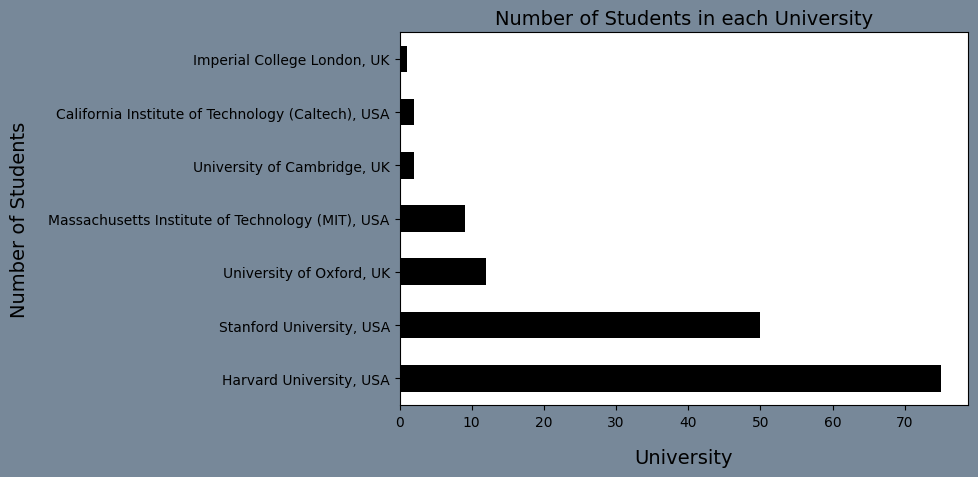

In [235]:
# Horizontal Bar Graph for University
fig, ax = plt.subplots(facecolor = "lightslategrey")
students["UNIVERSITY"].value_counts().plot(kind = "barh", figsize=(10, 5), rot = 0, color = "black")
plt.xlabel("University", labelpad=14)
plt.ylabel("Number of Students", labelpad=14)
plt.title("Number of Students in each University")
save_fig("univeristy_graph")

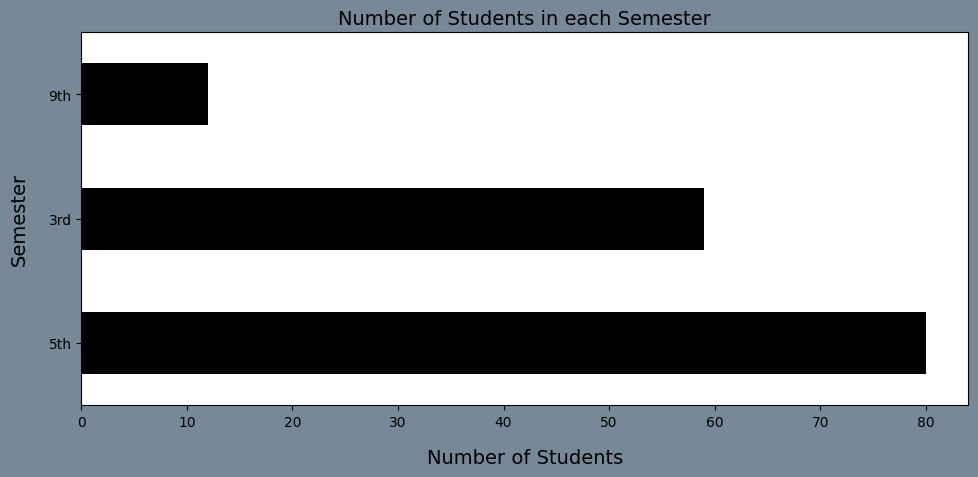

In [236]:
# Horizontal Bar Graph for Semester
fig, ax = plt.subplots(facecolor = "lightslategrey")
students["SEMESTER"].value_counts().plot(kind = "barh", figsize=(10, 5), rot = 0, color = "black")
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Semester", labelpad=14)
plt.title("Number of Students in each Semester")
save_fig("semester_graph")

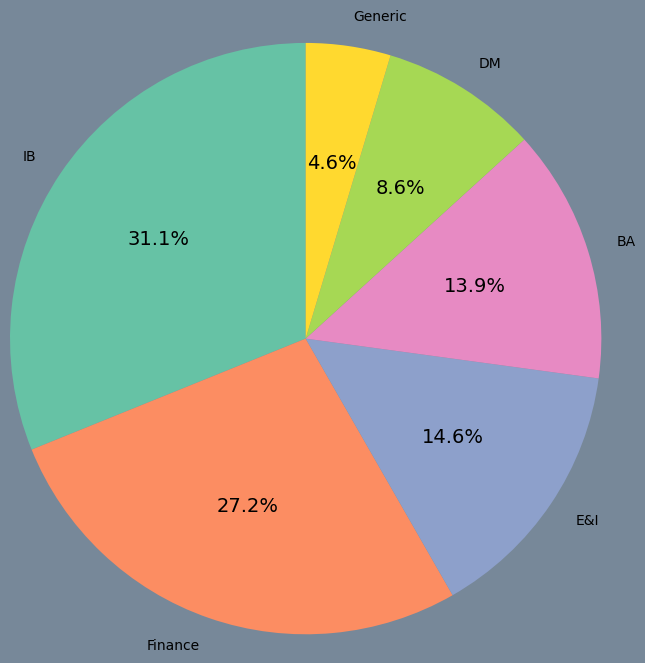

<Figure size 1000x700 with 0 Axes>

In [238]:
# Pie Graph to show the distribution of the Domain
import seaborn as sns
domain = students["Domain"].value_counts()
fig, axes = plt.subplots(facecolor = "lightslategrey")
plt.figure(figsize=(10,7))
axes.pie(domain, labels = domain.index, startangle = 90, autopct="%1.1f%%", radius=2, colors = sns.color_palette("Set2"))
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_30760\3201353878.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  students.hist(ax = axes, bins = 20, figsize=(10,7), color = "#5D5D5D")


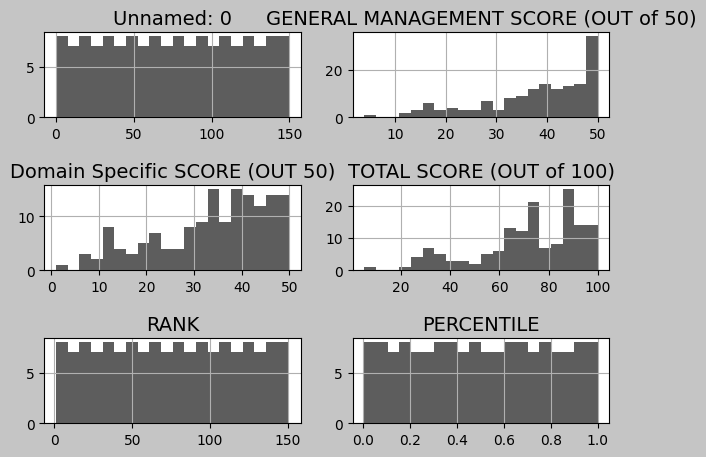

In [276]:
# Create Histograms for numerical data
fig, axes = plt.subplots(facecolor = "#C5C5C5")
axes = fig.gca()
students.hist(ax = axes, bins = 20, figsize=(10,7), color = "#5D5D5D")
fig.tight_layout()
plt.show()

## Grouped Graphs by Percentile

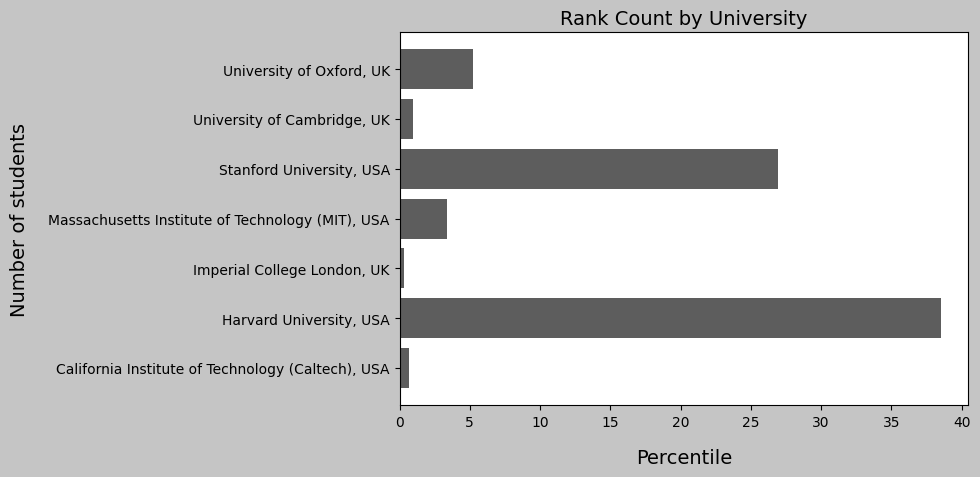

In [262]:
# University Histogram
university_rank = students.groupby(["UNIVERSITY"])[["PERCENTILE"]].sum().reset_index()

fig, axes = plt.subplots(facecolor = "#C5C5C5", figsize = (10,5))
axes.barh(university_rank["UNIVERSITY"], university_rank["PERCENTILE"], color = "#5D5D5D")
# university_rank.plot(kind = "barh", x = "UNIVERSITY", y = "PERCENTILE", figsize=(10, 5), rot = 0, color = "black")
plt.xlabel("Percentile", labelpad=14)
plt.ylabel("Number of students", labelpad=14)
plt.title("Rank Count by University")
save_fig("university_percentile_graph")

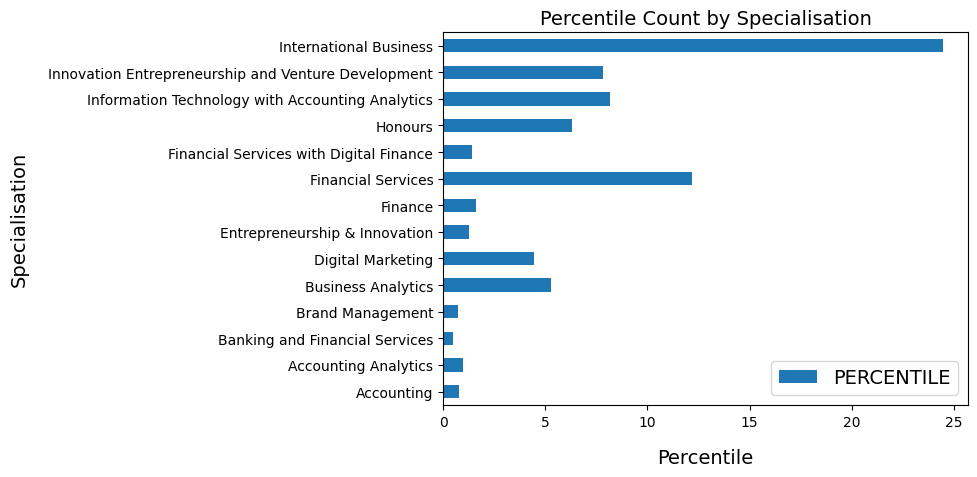

In [230]:
#Domain Grouped Graph
university_rank = students.groupby(["Specialisation"])[["PERCENTILE"]].sum().reset_index()
university_fig = university_rank.plot(kind = "barh", x = "Specialisation", y = "PERCENTILE", figsize=(10, 5), rot = 0)
plt.xlabel("Percentile", labelpad=14)
plt.ylabel("Specialisation", labelpad=14)
plt.title("Percentile Count by Specialisation")

save_fig("specialisation_percentile_graph")

## Analysis Thoughts
### Linear Regression
What are some analysis that I can do with this data?

Analysis Question: <br>
How does program, semester, domain and university affect Percentile?
- 4 Predictor Variables (Program, Semester, Domain, University) and 1 Outcome Variable (Percentile)
- In future analysis, the outcome variable can be set to the Domain Specific Score and General Management Score
- Let's start with a linear regression

### Steps
- Drop unneeded columns
- Dummy Codes for the categorical varirables
- Convert Semester to a Numerical Variable
- Standardize



## Preprocessing 

In [193]:
# Drop Columns
# Convert Semester to Numerical
# Grab and encode Categorical variables
# Create a new data frame to keep the original data in tact
students_data = students.drop(["NAME OF THE STUDENT","Unnamed: 0"], axis = 1)
students_data["SEMESTER"].replace({"5th": 5, "3rd": 3, "9th": 9}, inplace=True)



In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


# students_data = students[["UNIVERSITY","PROGRAM NAME","Specialisation", "SEMESTER",  "Domain", "PERCENTILE"]]
encoder_cols = students_data.select_dtypes(["object"]).columns

encoding = OrdinalEncoder()
students_data[encoder_cols] = encoding.fit_transform(students_data[encoder_cols])
X = students_data.drop(["PERCENTILE"], axis = 1)
y = students_data[["PERCENTILE"]].copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [196]:
y_prediction = lin_reg.predict(X_test)
print(y_prediction[:5])
print(y_test[:5].values)

[[0.47019868]
 [0.49006623]
 [0.0397351 ]
 [0.24503311]
 [0.06622517]]
[[0.47019868]
 [0.49006623]
 [0.0397351 ]
 [0.24503311]
 [0.06622517]]


In [197]:
# Model Scores
lin_reg.score(X_train, y_train)
lin_reg.score(X_test, y_test)

1.0

## Linear Regression Metrics
- RMSE =~ 0
- R<sup>2 </sup>= 1

In [224]:
# Check the RMSE of this model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_rmse = mean_squared_error(y_test, y_prediction)
print(lin_rmse) #0.26 which is okay

r2 = r2_score(y_test, y_prediction)
print(r2) #0.22 Not Great

# model_coef = lin_reg.named_steps['linearregression'].coef_
# model_coef

1.102456004617192e-19
1.0


# Data Plot

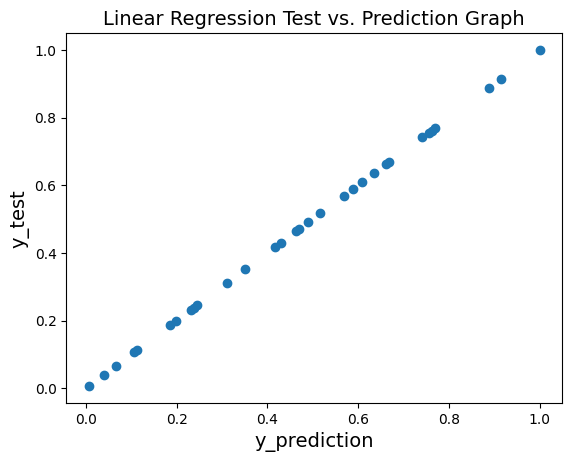

<Figure size 640x480 with 0 Axes>

In [223]:
fig_scatter, ax_scatter = plt.subplots()
ax_scatter.scatter(y_prediction, y_test)
ax_scatter.set_xlabel("y_prediction")
ax_scatter.set_ylabel("y_test")
ax_scatter.set_title("Linear Regression Test vs. Prediction Graph")
plt.show()
save_fig("Linear_Regression Plot")

# SGD Regressor
Linear Regression seems to be overfitting <br>
Let's Try SGDRegressor

In [214]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 10000, tol = 1e-3)
sgd_reg.fit(X_train, np.ravel(y_train))

SGDRegressor(max_iter=10000)

In [215]:
sgd_prediction = sgd_reg.predict(X_test)
print(sgd_prediction[:5])
print(y[:5].values)

[ 0.47119215  0.4955497  -0.06938538  0.29157468 -0.0129741 ]
[[1.        ]
 [0.99337748]
 [0.98675497]
 [0.98013245]
 [0.97350993]]


In [216]:
train_sgd_score = sgd_reg.score(X_train, y_train)
test_sgd_score = sgd_reg.score(X_test, y_test)
print(train_sgd_score)
print(test_sgd_score)

0.9669583924185815
0.9355780639987716


In [217]:
# Check the RMSE of this model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_rmse = mean_squared_error(y_test, sgd_prediction)
print(lin_rmse) #0.004

r2 = r2_score(y_test, sgd_prediction)
print(r2) #0.936

0.004807289506065453
0.9355780639987716


## SGD Data Plot

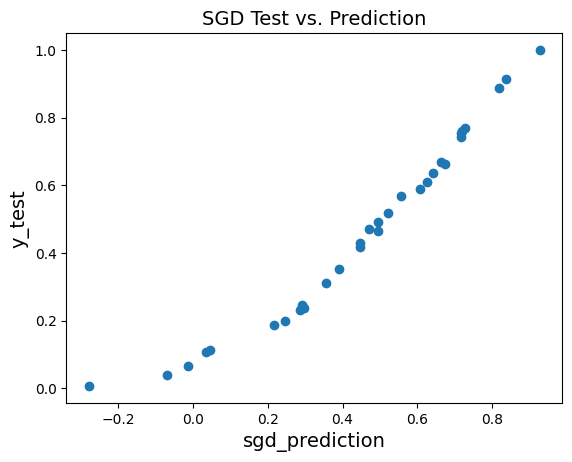

<Figure size 640x480 with 0 Axes>

In [222]:
fig1_scatter, ax1_scatter = plt.subplots()
ax1_scatter.scatter(sgd_prediction, y_test)
ax1_scatter.set_xlabel("sgd_prediction")
ax1_scatter.set_ylabel("y_test")
ax1_scatter.set_title("SGD Test vs. Prediction")
plt.show() #reasonable and shows the skew of the scores a bit better
save_fig("SGD_Plot")

## Compare with R Code
R can output a breakdown of the inputs so I can compare linear models easily
Start with most Complex Model and move from there

In [211]:
from statsmodels.formula.api import ols

students_data["Program_Name"] = students_data["PROGRAM NAME"] # API does not like spaces
students_data_scaled = scaler.fit_transform(students_data)
students_data_scaled = pd.DataFrame(students_data_scaled, columns=students_data.columns)
model = ols("PERCENTILE ~ SEMESTER + Program_Name + Domain + UNIVERSITY + Specialisation", data = students_data_scaled)
results = model.fit()
print(results.summary())
# R-squared = 0.236
# 

                            OLS Regression Results                            
Dep. Variable:             PERCENTILE   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.110
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.358
Time:                        13:17:51   Log-Likelihood:                -211.42
No. Observations:                 151   AIC:                             434.8
Df Residuals:                     145   BIC:                             453.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.649e-16      0.082   -5.7e

In [212]:
model2 = ols("PERCENTILE ~ SEMESTER", data = students_data_scaled)
results2 = model2.fit()
print(results2.summary()) #0.010

model3 = ols("PERCENTILE ~ Program_Name", data = students_data_scaled)
results3 = model3.fit()
# print(results3.summary()) #r^2 = 0.060

model4 = ols("PERCENTILE ~ UNIVERSITY", data = students_data_scaled)
results4 = model.fit()
# print(results4.summary()) #r^2 = 0.236

model5 = ols("PERCENTILE ~ Specialisation", data = students_data_scaled)
results5 = model5.fit()
# print(results5.summary()) #r^2 = 0.18


                            OLS Regression Results                            
Dep. Variable:             PERCENTILE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.02288
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.880
Time:                        13:17:55   Log-Likelihood:                -214.25
No. Observations:                 151   AIC:                             432.5
Df Residuals:                     149   BIC:                             438.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.372e-16      0.082  -5.34e-15      1.0